In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Subod\\OneDrive\\Desktop\\nebulanet')

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head() # to display the first 5 rows of the dataframe

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Umber Dwarfs,Red,M
1,3042,0.000500,0.1542,16.60,Umber Dwarfs,Red,M
2,2600,0.000300,0.1020,18.70,Umber Dwarfs,Red,M
3,2800,0.000200,0.1600,16.65,Umber Dwarfs,Red,M
4,1939,0.000138,0.1030,20.06,Umber Dwarfs,Red,M


In [4]:
df_train.shape # dimensions of the dataframe

(216, 7)

In [5]:
df_train.info() # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         216 non-null    int64  
 1   Luminosity(L/Lo)        216 non-null    float64
 2   Radius(R/Ro)            216 non-null    float64
 3   Absolute magnitude(Mv)  216 non-null    float64
 4   Star type               216 non-null    object 
 5   Star color              216 non-null    object 
 6   Spectral Class          216 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 11.9+ KB


In [6]:
df_train.describe() # description of data in the dataframe (numerical)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,216.000000,216.000000,216.000000,216.000000
mean,10211.055556,101421.163769,223.778661,4.528634
std,9214.606535,172474.272121,504.416657,10.475934
min,1939.000000,0.000080,0.008400,-11.920000
25%,3344.250000,0.000878,0.102750,-6.225500
50%,5776.000000,0.039000,0.702500,10.150000
75%,14366.750000,195750.000000,39.750000,13.830000
max,40000.000000,834042.000000,1948.500000,20.060000


In [7]:
df_train.describe(include='object') # description of data in the dataframe (categorical)

,Star type,Star color,Spectral Class
count,216,216,216
unique,6,18,7
top,Crimson Dwarfs,Red,M
freq,38,102,101


In [8]:
df_train['Star color'].value_counts() # checking the unique values in column 'Star color'

Red                   102
Blue                   49
Blue-white             23
yellow-white            8
White                   7
Blue White              7
Yellowish White         3
Blue white              3
white                   3
Whitish                 2
yellowish               2
Pale yellow orange      1
Orange                  1
White-Yellow            1
Blue                    1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

<AxesSubplot: xlabel='count', ylabel='Star color'>

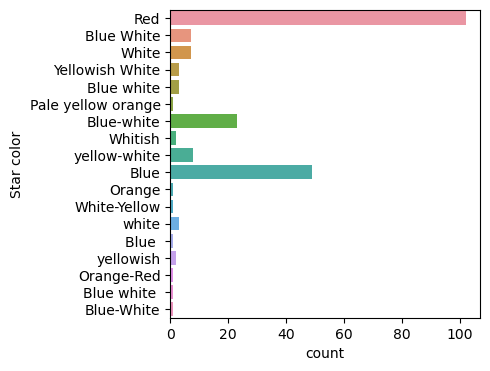

In [9]:
# plotting the distribution of all color stars
plt.figure(figsize = (4,4))
sns.countplot(y=df_train["Star color"])

In [10]:
# converting the categorical column 'Star color' into numerical using LabelEncoding Technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Star color'] = label_encoder.fit_transform(df_train['Star color'])
df_train['Star color'].unique()

array([10,  2, 11, 14,  3,  9,  6, 13, 16,  0,  7, 12, 15,  1, 17,  8,  4,
        5])

In [11]:
df_train['Spectral Class'].value_counts() # checking the unique values in column 'Spectral Class'

M    101
B     40
O     35
A     18
F     17
K      4
G      1
Name: Spectral Class, dtype: int64

<AxesSubplot: xlabel='Spectral Class', ylabel='count'>

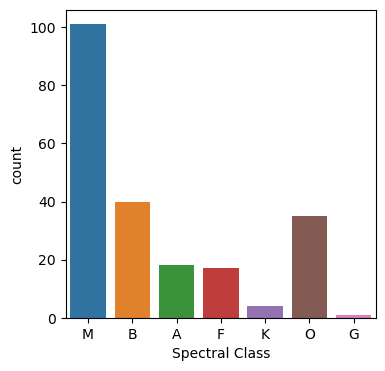

In [12]:
# plotting the distribution of spectral classes
plt.figure(figsize = (4,4))
sns.countplot(x=df_train["Spectral Class"])

In [13]:
# converting the categorical column 'Spectral Class' into numerical using LabelEncoding Technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_train['Spectral Class'] = label_encoder.fit_transform(df_train['Spectral Class'])
df_train['Spectral Class'].unique()

array([5, 1, 0, 2, 4, 6, 3])

In [14]:
df_train['Star type'].value_counts() # checking the unique values in column 'Star type'

Crimson Dwarfs          38
Aurelian Mainstays      37
Pearl Dwarfs            36
Celestial Sovereigns    36
Umber Dwarfs            35
Cosmic Behemoths        34
Name: Star type, dtype: int64

<AxesSubplot: xlabel='count', ylabel='Star type'>

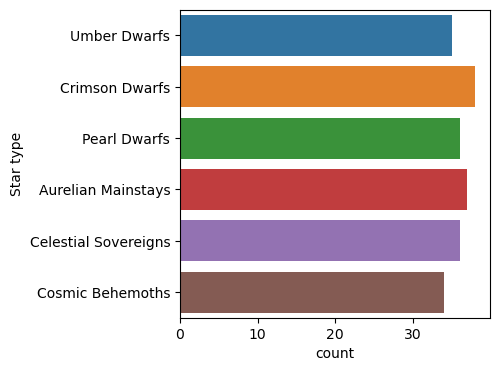

In [15]:
# plotting the distribution of different types of stars 
plt.figure(figsize = (4,4))
sns.countplot(y=df_train["Star type"])

In [16]:
df_train.skew() # checking for skewness in train data

C:\Users\Subod\AppData\Local\Temp\ipykernel_22168\3708403367.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train.skew() # checking for skewness in train data


Temperature (K)           1.344488
Luminosity(L/Lo)          2.130132
Radius(R/Ro)              2.066023
Absolute magnitude(Mv)   -0.144586
Star color               -0.362170
Spectral Class           -0.638578
dtype: float64

In [17]:
# correcting skewness in the column 'Temperature (K)' using Log Transformation
df_train['Temperature (K)'] = np.log(df_train['Temperature (K)'])
df_train['Temperature (K)'].skew()

0.4548464436761747

In [18]:
# correcting skewness in the column 'Luminosity(L/Lo)' using Log Transformation
df_train['Luminosity(L/Lo)'] = np.log(df_train['Luminosity(L/Lo)'])
df_train['Luminosity(L/Lo)'].skew()

0.2147808706889853

In [19]:
# correcting skewness in the column 'Radius(R/Ro)' using Log Transformation
df_train['Radius(R/Ro)'] = np.log(df_train['Radius(R/Ro)'])
df_train['Radius(R/Ro)'].skew()

0.37105244781331065

<AxesSubplot: xlabel='Absolute magnitude(Mv)', ylabel='Count'>

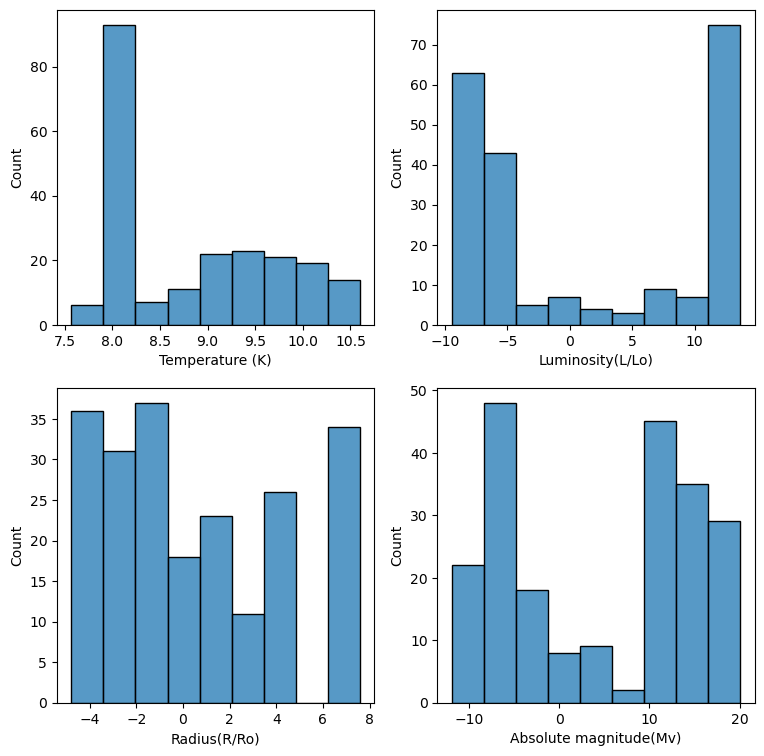

In [20]:
fig, axis = plt.subplots(2,2, figsize = (9,9))
sns.histplot(x=df_train["Temperature (K)"], ax = axis[0,0])
sns.histplot(x=df_train["Luminosity(L/Lo)"], ax = axis[0,1])
sns.histplot(x=df_train["Radius(R/Ro)"], ax = axis[1,0])
sns.histplot(x=df_train["Absolute magnitude(Mv)"], ax = axis[1,1] )

In [21]:
df_test = pd.read_csv('test.csv')
df_test.head() # to display the first 5 rows of the dataframe

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class
0,16500,0.01300,0.014,11.89,Blue White,B
1,2637,0.00073,0.127,17.22,Red,M
2,4980,0.35700,1.130,4.78,Yellowish,K
3,33421,352000.00000,67.000,-5.79,Blue,O
4,11096,112000.00000,12.000,-5.91,Blue,O


In [22]:
df_test.shape # dimensions of the dataframe

(24, 6)

In [23]:
df_test.info() # information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         24 non-null     int64  
 1   Luminosity(L/Lo)        24 non-null     float64
 2   Radius(R/Ro)            24 non-null     float64
 3   Absolute magnitude(Mv)  24 non-null     float64
 4   Star color              24 non-null     object 
 5   Spectral Class          24 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ KB


In [24]:
df_test.describe() # description of data in the dataframe (numerical)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
count,24.000000,24.000000,24.000000,24.000000
mean,13075.125000,159093.142425,357.569867,3.066250
std,12115.130907,230999.626822,619.612531,11.174061
min,2637.000000,0.000180,0.009200,-10.920000
25%,3384.250000,0.000810,0.115075,-6.847500
50%,8038.000000,546.178500,3.437500,1.370000
75%,19042.250000,325725.000000,363.250000,12.365000
max,39000.000000,849420.000000,1522.000000,19.630000


In [25]:
df_test.describe(include='object') # description of data in the dataframe (categorical)

,Star color,Spectral Class
count,24,24
unique,6,5
top,Red,M
freq,10,10


In [26]:
df_test['Star color'].value_counts() # checking the unique values in column 'Star color'

Red           10
Blue           6
Blue White     3
Blue-white     3
Yellowish      1
Orange         1
Name: Star color, dtype: int64

<AxesSubplot: xlabel='count', ylabel='Star color'>

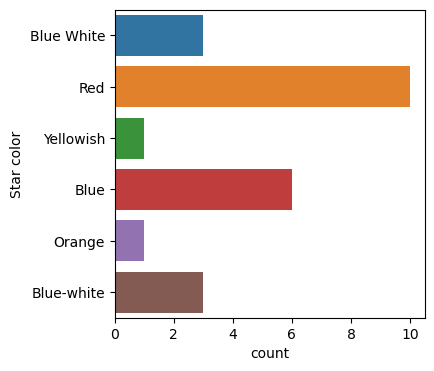

In [27]:
# plotting the distribution of all color stars
plt.figure(figsize = (4,4))
sns.countplot(y=df_test["Star color"])

In [28]:
# converting the categorical column 'Star color' into numerical using LabelEncoding Technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_test['Star color'] = label_encoder.fit_transform(df_test['Star color'])
df_test['Star color'].unique()

array([1, 4, 5, 0, 3, 2])

In [29]:
df_test['Spectral Class'].value_counts() # checking the unique values in column 'Spectral Class'

M    10
B     6
O     5
K     2
A     1
Name: Spectral Class, dtype: int64

<AxesSubplot: xlabel='Spectral Class', ylabel='count'>

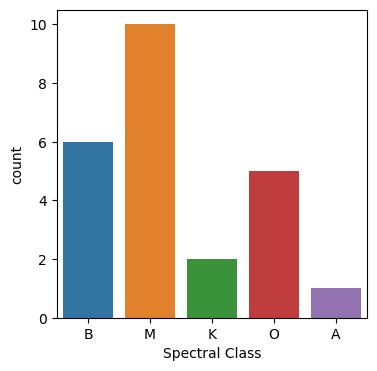

In [30]:
# plotting the distribution of spectral classes
plt.figure(figsize = (4,4))
sns.countplot(x=df_test["Spectral Class"])

In [31]:
# converting the categorical column 'Spectral Class' into numerical using LabelEncoding Technique
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_test['Spectral Class'] = label_encoder.fit_transform(df_test['Spectral Class'])
df_test['Spectral Class'].unique()

array([1, 3, 2, 4, 0])

In [32]:
df_test.skew()  # checking for skewness in test data

Temperature (K)           1.016858
Luminosity(L/Lo)          1.615542
Radius(R/Ro)              1.256635
Absolute magnitude(Mv)    0.094935
Star color               -0.224380
Spectral Class           -0.475014
dtype: float64

In [33]:
# correcting skewness in the column 'Temperature (K)' using Log Transformation
df_test['Temperature (K)'] = np.log(df_test['Temperature (K)'])
df_test['Temperature (K)'].skew()

0.25178723261132463

In [34]:
# correcting skewness in the column 'Luminosity(L/Lo)' using Log Transformation
df_test['Luminosity(L/Lo)'] = np.log(df_test['Luminosity(L/Lo)'])
df_test['Luminosity(L/Lo)'].skew()

-0.0365120263218377

In [35]:
# correcting skewness in the column 'Radius(R/Ro)' using Log Transformation
df_test['Radius(R/Ro)'] = np.log(df_test['Radius(R/Ro)'])
df_test['Radius(R/Ro)'].skew()

0.20218569429258668

<AxesSubplot: xlabel='Absolute magnitude(Mv)', ylabel='Count'>

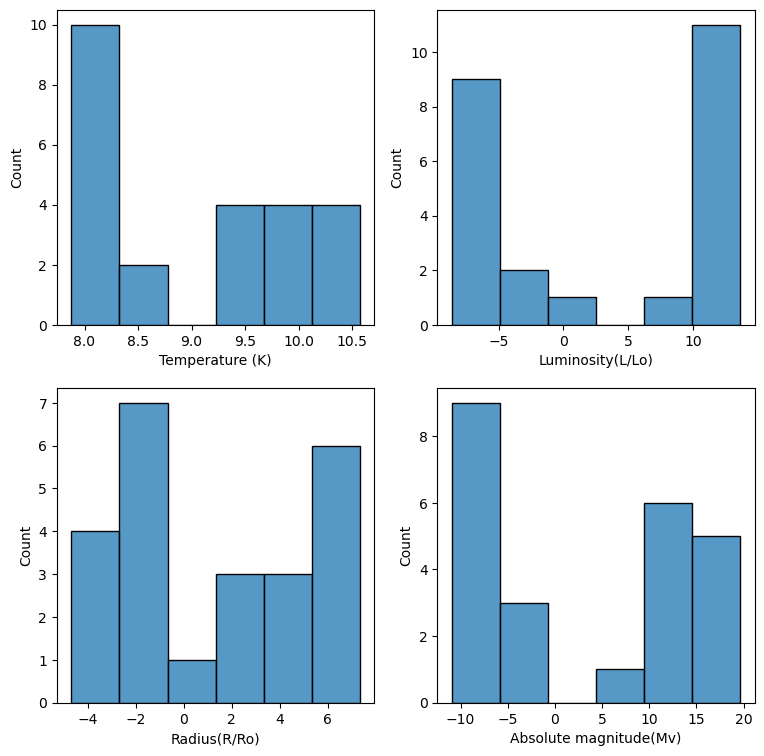

In [36]:
fig, axis = plt.subplots(2,2, figsize = (9,9))
sns.histplot(x=df_test["Temperature (K)"], ax = axis[0,0])
sns.histplot(x=df_test["Luminosity(L/Lo)"], ax = axis[0,1])
sns.histplot(x=df_test["Radius(R/Ro)"], ax = axis[1,0])
sns.histplot(x=df_test["Absolute magnitude(Mv)"], ax = axis[1,1] )

In [37]:
# rearranging the columns for splitting purpose
df_train = df_train[['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star color','Spectral Class','Star type']]
df_train.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,8.028781,-6.032287,-1.771957,16.12,10,5,Umber Dwarfs
1,8.020270,-7.600902,-1.869505,16.60,10,5,Umber Dwarfs
2,7.863267,-8.111728,-2.282782,18.70,10,5,Umber Dwarfs
3,7.937375,-8.517193,-1.832581,16.65,10,5,Umber Dwarfs
4,7.569928,-8.888257,-2.273026,20.06,10,5,Umber Dwarfs


In [38]:
X = df_train.iloc[:,0:6]
y = df_train['Star type']

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# creating a Grid Search Cross-Validation object
grid_cv = GridSearchCV(rfc, param_grid, cv=5)

# fitting the Grid Search Cross-Validation object to the data
X = df_train.iloc[:,0:6]
y = df_train['Star type']
grid_cv.fit(X, y)

# printing the best hyperparameters found
print("Best Hyperparameters:", grid_cv.best_params_)

# printing the accuracy score with the best hyperparameters
print("Accuracy:", grid_cv.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.9953488372093023


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rfc = RandomForestClassifier(n_estimators=150, max_depth=None, min_samples_split=5, min_samples_leaf=2)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [41]:
print(y_pred.shape)

y_pred

(44,)


array(['Celestial Sovereigns', 'Cosmic Behemoths', 'Aurelian Mainstays',
       'Crimson Dwarfs', 'Crimson Dwarfs', 'Umber Dwarfs', 'Pearl Dwarfs',
       'Pearl Dwarfs', 'Celestial Sovereigns', 'Aurelian Mainstays',
       'Cosmic Behemoths', 'Aurelian Mainstays', 'Aurelian Mainstays',
       'Crimson Dwarfs', 'Crimson Dwarfs', 'Crimson Dwarfs',
       'Crimson Dwarfs', 'Pearl Dwarfs', 'Cosmic Behemoths',
       'Crimson Dwarfs', 'Pearl Dwarfs', 'Aurelian Mainstays',
       'Pearl Dwarfs', 'Aurelian Mainstays', 'Cosmic Behemoths',
       'Celestial Sovereigns', 'Umber Dwarfs', 'Pearl Dwarfs',
       'Cosmic Behemoths', 'Celestial Sovereigns', 'Umber Dwarfs',
       'Umber Dwarfs', 'Umber Dwarfs', 'Aurelian Mainstays',
       'Crimson Dwarfs', 'Pearl Dwarfs', 'Pearl Dwarfs',
       'Aurelian Mainstays', 'Crimson Dwarfs', 'Celestial Sovereigns',
       'Celestial Sovereigns', 'Pearl Dwarfs', 'Crimson Dwarfs',
       'Celestial Sovereigns'], dtype=object)

In [42]:
y_pred = y_pred.flatten() # flatten() is to get a copy of an given array collapsed into one dimension.
y_pred = y_pred.tolist() # converts array to an ordinary list

In [43]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

Crimson Dwarfs          10
Pearl Dwarfs             9
Aurelian Mainstays       8
Celestial Sovereigns     7
Cosmic Behemoths         5
Umber Dwarfs             5
dtype: int64

In [44]:
y_test.value_counts()

Crimson Dwarfs          10
Pearl Dwarfs             9
Aurelian Mainstays       8
Celestial Sovereigns     7
Cosmic Behemoths         5
Umber Dwarfs             5
Name: Star type, dtype: int64

In [45]:
y_result = rfc.predict(df_test)
y_result

array(['Pearl Dwarfs', 'Umber Dwarfs', 'Aurelian Mainstays',
       'Celestial Sovereigns', 'Celestial Sovereigns', 'Cosmic Behemoths',
       'Cosmic Behemoths', 'Pearl Dwarfs', 'Umber Dwarfs', 'Pearl Dwarfs',
       'Celestial Sovereigns', 'Pearl Dwarfs', 'Cosmic Behemoths',
       'Celestial Sovereigns', 'Cosmic Behemoths', 'Cosmic Behemoths',
       'Umber Dwarfs', 'Crimson Dwarfs', 'Aurelian Mainstays',
       'Umber Dwarfs', 'Umber Dwarfs', 'Crimson Dwarfs',
       'Cosmic Behemoths', 'Aurelian Mainstays'], dtype=object)

In [46]:
y_result = pd.DataFrame(y_result.flatten())
df_test['Star type'] = y_result

In [47]:
prediction = df_test.drop(['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star color','Spectral Class'], axis = 1)

In [49]:
prediction

,Star type
0,Pearl Dwarfs
1,Umber Dwarfs
2,Aurelian Mainstays
3,Celestial Sovereigns
4,Celestial Sovereigns
5,Cosmic Behemoths
6,Cosmic Behemoths
7,Pearl Dwarfs
8,Umber Dwarfs
9,Pearl Dwarfs
